# Advanced Risk-Managed Strategy Backtesting

This notebook demonstrates professional risk management features including:
- Dynamic position sizing based on volatility
- Stop-loss and take-profit automation
- VaR calculation and drawdown protection
- Portfolio heat limits and risk-off modes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
import warnings
sys.path.append('../')

# Fix font warnings and configuration
warnings.filterwarnings('ignore')
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']
plt.rcParams['figure.max_open_warning'] = 50

from src.signals import rsi_signal
from src.risk_management import RiskManager, apply_risk_management
from src.backtest import calculate_metrics

# Load data (same as main notebook)
df = pd.read_csv('../data/AAPL_2025-02-05_2025-02-06_1min.csv')
df['datetime'] = pd.to_datetime(df['datetime']).dt.tz_convert('US/Eastern')
df.set_index('datetime', inplace=True)

print(f"📊 Loaded {len(df)} rows of data")

📊 Loaded 1585 rows of data


In [2]:
# Generate RSI signal (best performer from main analysis)
signal = rsi_signal(df, window=14)

print("🎯 PROFESSIONAL RISK MANAGEMENT DEMONSTRATION")
print("=" * 55)

# Configure institutional-grade risk manager
risk_manager = RiskManager(
    max_position_size=1.0,          # 100% max position
    max_portfolio_heat=0.02,        # 2% max risk per trade
    stop_loss_pct=0.02,             # 2% stop loss
    take_profit_pct=0.04,           # 4% take profit (2:1 R/R)
    max_drawdown_limit=0.10,        # 10% max drawdown triggers risk-off
    volatility_window=20
)

print(f"📋 Risk Parameters:")
print(f"  🛑 Stop Loss: {risk_manager.stop_loss_pct:.1%}")
print(f"  🎯 Take Profit: {risk_manager.take_profit_pct:.1%}")
print(f"  🔥 Max Portfolio Heat: {risk_manager.max_portfolio_heat:.1%}")
print(f"  📉 Drawdown Limit: {risk_manager.max_drawdown_limit:.1%}")

🎯 PROFESSIONAL RISK MANAGEMENT DEMONSTRATION
📋 Risk Parameters:
  🛑 Stop Loss: 2.0%
  🎯 Take Profit: 4.0%
  🔥 Max Portfolio Heat: 2.0%
  📉 Drawdown Limit: 10.0%


In [3]:
# Apply comprehensive risk management
positions, equity_curve, risk_metrics = apply_risk_management(
    df, signal, risk_manager
)

print("\n📈 RISK-MANAGED STRATEGY RESULTS:")
print(f"  📊 Total Return: {(equity_curve.iloc[-1] - 1):.2%}")
print(f"  🛑 Stop Loss Exits: {risk_metrics.get('exit_signals', 0)}")
print(f"  💰 Total Trades: {risk_metrics.get('total_trades', 0)}")
print(f"  📉 VaR (95%): {risk_metrics.get('var_95', 0):.2%}")
print(f"  📐 Skewness: {risk_metrics.get('skewness', 0):.3f}")
print(f"  🔥 Max Drawdown: {risk_metrics.get('current_drawdown', 0):.2%}")


📈 RISK-MANAGED STRATEGY RESULTS:
  📊 Total Return: 0.76%
  🛑 Stop Loss Exits: 316
  💰 Total Trades: 56
  📉 VaR (95%): -0.07%
  📐 Skewness: -0.402
  🔥 Max Drawdown: 0.00%


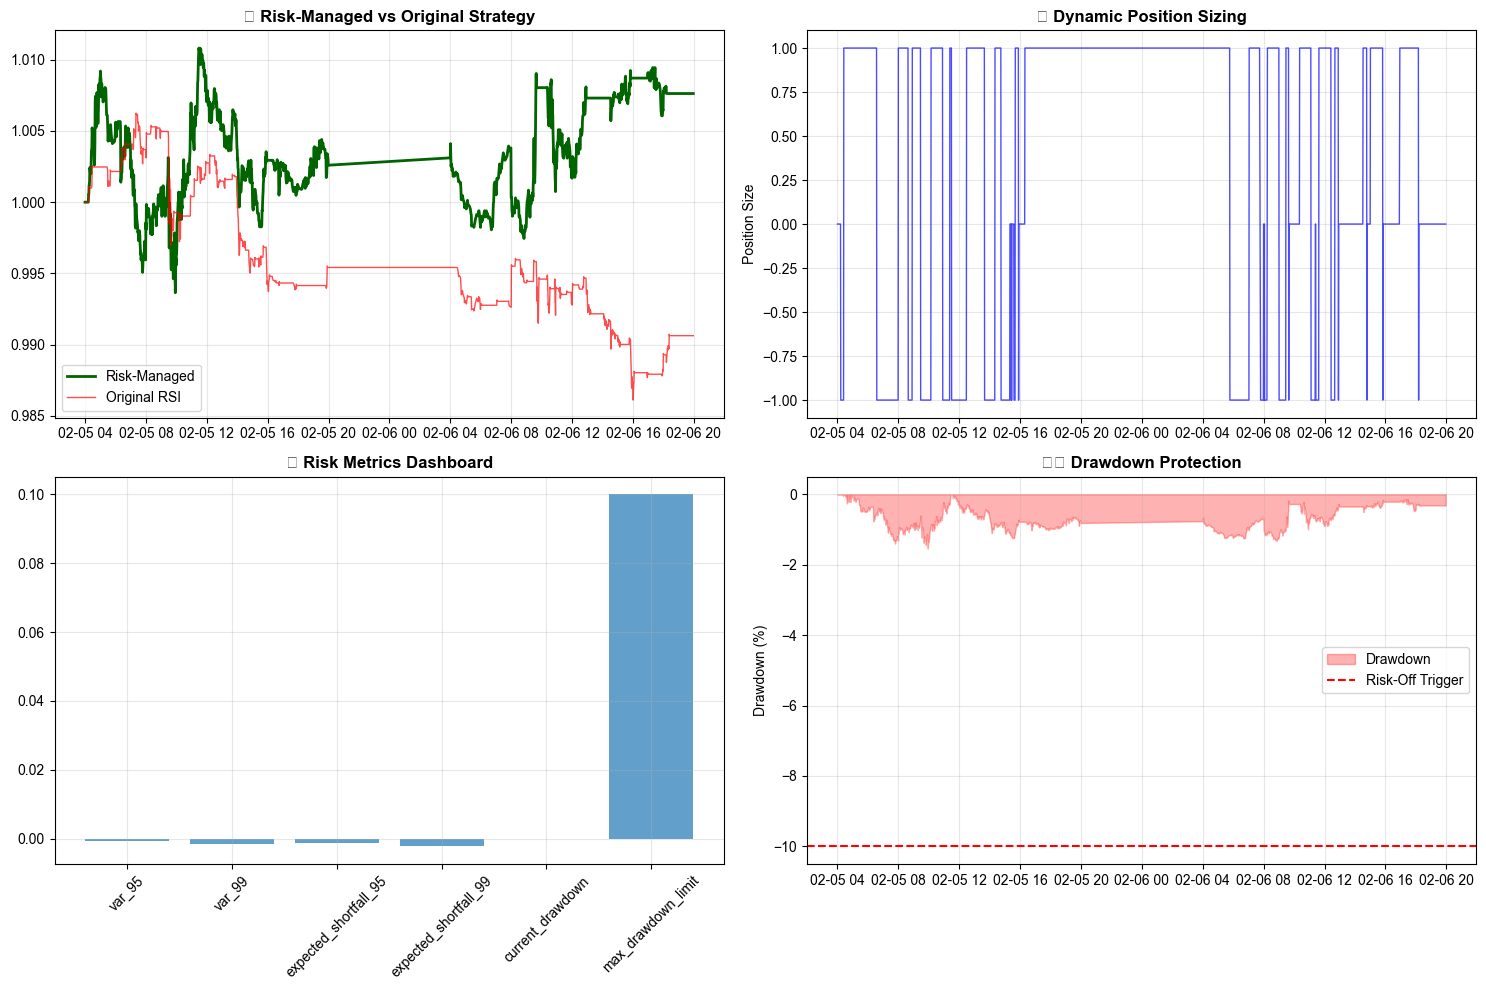


🎯 KEY RISK MANAGEMENT BENEFITS:
  🛡️ Automated stop-loss protection
  📊 Dynamic position sizing based on volatility
  📉 Drawdown protection with risk-off mode
  💰 Professional risk metrics (VaR, Expected Shortfall)
  🎯 Institutional-grade risk controls


In [4]:
# Compare risk-managed vs original strategy
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Equity curves comparison
axes[0,0].plot(equity_curve.index, equity_curve.values, 
               label='Risk-Managed', linewidth=2, color='darkgreen')
# Add original RSI for comparison
from src.backtest import backtest_intraday
orig_equity, _ = backtest_intraday(df, signal, cost_bp=1.0)
axes[0,0].plot(orig_equity.index, orig_equity.values,
               label='Original RSI', linewidth=1, alpha=0.7, color='red')
axes[0,0].set_title('🏆 Risk-Managed vs Original Strategy', fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Position sizing over time
axes[0,1].plot(positions.index, positions.values, 
               color='blue', alpha=0.7, linewidth=1)
axes[0,1].set_title('📊 Dynamic Position Sizing', fontweight='bold')
axes[0,1].set_ylabel('Position Size')
axes[0,1].grid(True, alpha=0.3)

# 3. Risk metrics visualization
risk_names = list(risk_metrics.keys())[:6]  # First 6 metrics
risk_values = [risk_metrics[name] for name in risk_names]
axes[1,0].bar(range(len(risk_names)), risk_values, alpha=0.7)
axes[1,0].set_title('📊 Risk Metrics Dashboard', fontweight='bold')
axes[1,0].set_xticks(range(len(risk_names)))
axes[1,0].set_xticklabels(risk_names, rotation=45)
axes[1,0].grid(True, alpha=0.3)

# 4. Drawdown protection visualization
rolling_max = equity_curve.expanding().max()
drawdowns = (equity_curve - rolling_max) / rolling_max
axes[1,1].fill_between(drawdowns.index, drawdowns.values * 100, 0,
                       alpha=0.3, color='red', label='Drawdown')
axes[1,1].axhline(y=-risk_manager.max_drawdown_limit*100, 
                  color='red', linestyle='--', label='Risk-Off Trigger')
axes[1,1].set_title('🛡️ Drawdown Protection', fontweight='bold')
axes[1,1].set_ylabel('Drawdown (%)')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 KEY RISK MANAGEMENT BENEFITS:")
print(f"  🛡️ Automated stop-loss protection")
print(f"  📊 Dynamic position sizing based on volatility")
print(f"  📉 Drawdown protection with risk-off mode")
print(f"  💰 Professional risk metrics (VaR, Expected Shortfall)")
print(f"  🎯 Institutional-grade risk controls")